# Exercise 4

A paper published by *Quality Engineering* reported a dataset that consists of loading weigths (in grams) of insecticide tanks. Data are reported in the file `ESE7_ex3.csv`. 
1. Design a control chart for the mean. Which conclusions can we draw about the process?
2. Consider the sample means as invidual measurements: design a control chart for the mean. 
3. Compare the results at point 1 and 2. What can we conclude?


In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE7_ex3.csv')

# Inspect the dataset
data.head()

,x1,x2,x3,x4
0,456,458,439,448
1,459,462,495,500
2,443,453,457,458
3,470,450,478,470
4,457,456,460,457


## Point 1

Design a control chart for the mean. Which conclusions can we draw about the process?

> ### Solution
>
> Inspect the data by plotting the individual datapoints. 

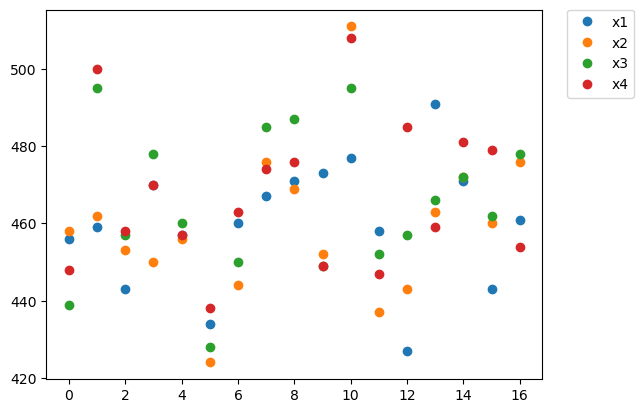

In [2]:
# Make a scatter plot of all the columns against the index
plt.plot(data['x1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['x2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['x3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['x4'], linestyle='none', marker='o', label = 'x4')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> Check if the data are normal.

Shapiro-Wilk test p-value = 0.593


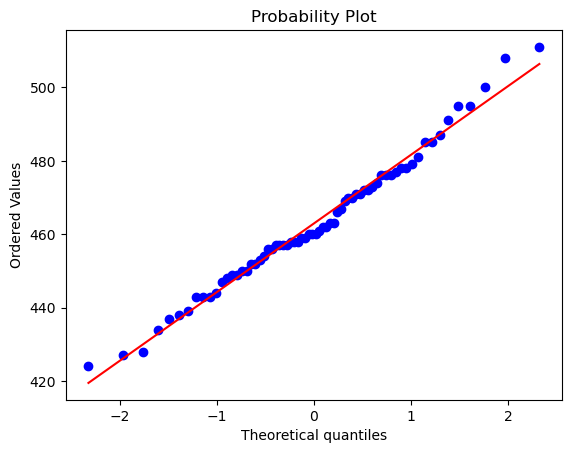

In [3]:
# Stack the columns on top of each other
data_stack = data.stack()

# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_stack)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_stack, dist="norm", plot=plt)
plt.show()

> Let's design the Xbar-R chart.

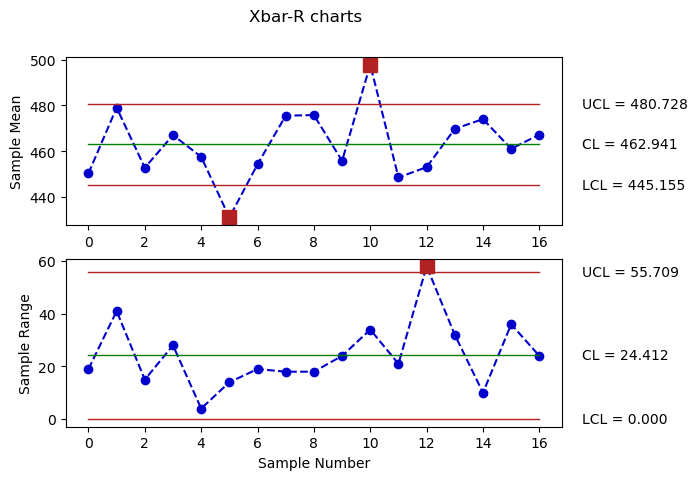

In [4]:
data_XR = qda.ControlCharts.XbarR(data)

The control limits of the Xbar chart look to narrow with respect to the natural variabilty of the statistic. This can be caused by a violation of assumptions (independence) within the sample. Thus, the Xbar-R control chart may be not approrpiate to monitor these data. 

## Point 2

Consider the sample means as invidual measurements: design a control chart for the mean.

> ### Solution
> Design a "Between groups" control chart, i.e., a chart that assumes all the samples to be individual measurements.

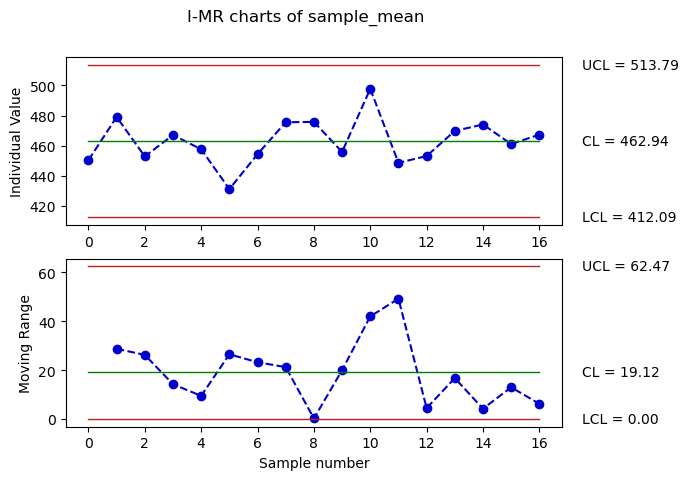

In [5]:
# Create a new dataframe that stores the mean of all the samples
data_Xbar = pd.DataFrame(data_XR['sample_mean'])

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')


With the I chart we can get rid of the violation of the independece assumption within the sample. The MR chart allows monitoring the between sample variability, while the R chart designed before can still be used to monitor the within sample variability. 
A control charting scheme quite effective in this case is the so-called I-MR-R control chart (or I-MR-S, if the S chart is used in place of the R chart), where: 1) the I chart allows monitoring the mean of the process treating sample means as individual observations; 2) the MR chart allows monitoring the between sample variability; 3) the MR chart allows monitoring the within sample variability.

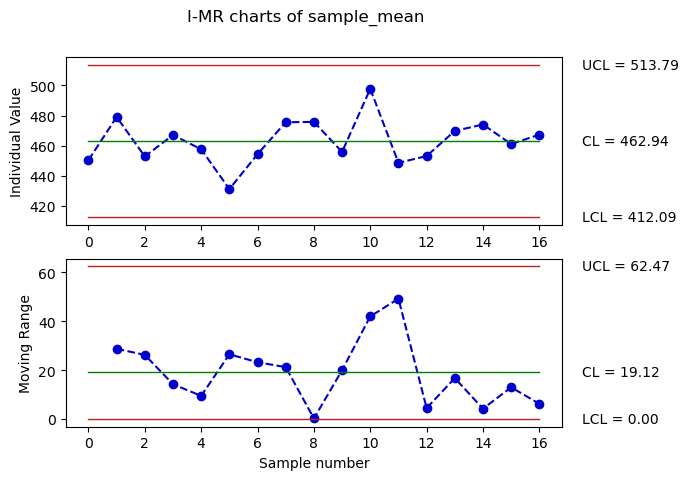

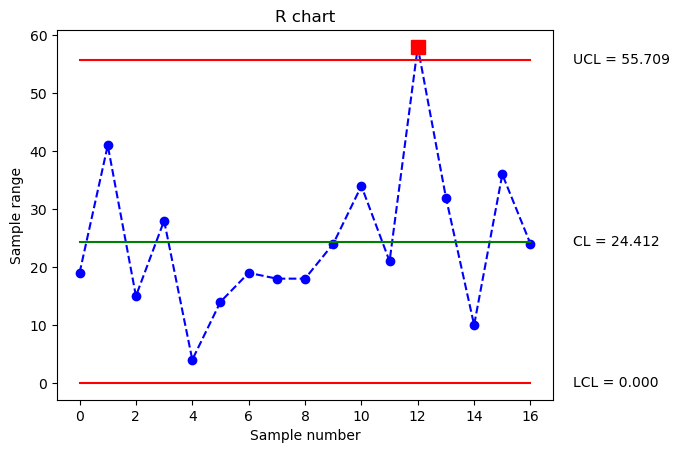

In [6]:
# Design a I-MR-R control chart

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')

# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


There is an alarm in the 13th sample. A search for assignable causes shall be performed. In the absence of information about possible assignable causes, the alarm can be labelled as a false alarm, and the design phase of the control chart is over.